# Librerias

In [1]:
# 📦 Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [26]:
# Cargar ambos archivos
df1 = pd.read_csv('data/monedas_completas.csv')
df2 = pd.read_csv('data/snapshot_master.csv')

# Tamaño de cada dataframe
print("🔢 Cantidad de filas y columnas:")
print("monedas_completas.csv:", df1.shape)
print("snapshot_master.csv:", df2.shape)

# Comparación de columnas
cols1 = set(df1.columns)
cols2 = set(df2.columns)

print("\n🧩 Columnas en monedas_completas pero no en snapshot_master:")
print(sorted(cols1 - cols2))

print("\n🧩 Columnas en snapshot_master pero no en monedas_completas:")
print(sorted(cols2 - cols1))

🔢 Cantidad de filas y columnas:
monedas_completas.csv: (5000, 26)
snapshot_master.csv: (2188, 27)

🧩 Columnas en monedas_completas pero no en snapshot_master:
[]

🧩 Columnas en snapshot_master pero no en monedas_completas:
['narrativa']


In [34]:
# Contar por narrativa
conteo_narrativas = df2['narrativa'].value_counts(dropna=False)

# Mostrar resultado
print(conteo_narrativas)

narrativa
Otra           1640
Memes           484
Videojuegos      58
Desconocida       6
Name: count, dtype: int64


# monedas_completas.csv

In [41]:
# 📂 Cargar el dataset
df = pd.read_csv('data/monedas_completas.csv')

## 1️⃣ Describe Data – Descripción inicial del dataset

In [42]:
print(df.dtypes)

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                          float64
market_cap_rank                     float64
fully_diluted_valuation             float64
total_volume                        float64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [43]:
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Cantidad de filas: 5000
Cantidad de columnas: 26


## 2️⃣ Verify Data Quality – Calidad de datos

In [30]:
# Revisión de valores nulos
print(df.isna().sum().sort_values(ascending=False))

market_cap_rank                     2188
roi                                 2175
max_supply                           834
price_change_24h                     615
market_cap_change_24h                615
price_change_percentage_24h          615
market_cap_change_percentage_24h     615
low_24h                              615
high_24h                             615
fully_diluted_valuation              141
total_supply                         133
current_price                          2
ath_date                               1
atl_date                               1
ath                                    1
atl                                    1
symbol                                 1
id                                     0
name                                   0
total_volume                           0
market_cap                             0
image                                  0
circulating_supply                     0
atl_change_percentage                  0
ath_change_perce

🗑️ Eliminar por exceso de nulos o irrelevancia:
roi, market_cap_rank (todos son nulos)

🧽 Limpiar o imputar según relevancia:
max_supply, fully_diluted_valuation, price_change_percentage_24h, low_24h, price_change_24h, high_24h, market_cap_change_24h, market_cap_change_percentage_24h, total_supply, current_price, atl, ath, atl_date, ath_date, atl_change_percentage, ath_change_percentage, symbol, total_volume

In [31]:
# Revisión de duplicados
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 217


In [32]:
# Porcentaje de valores nulos por columna
null_percent = df.isna().mean() * 100
print(null_percent.sort_values(ascending=False))

market_cap_rank                     100.000000
roi                                  99.405850
max_supply                           38.117002
price_change_24h                     28.107861
market_cap_change_24h                28.107861
price_change_percentage_24h          28.107861
market_cap_change_percentage_24h     28.107861
low_24h                              28.107861
high_24h                             28.107861
fully_diluted_valuation               6.444241
total_supply                          6.078611
current_price                         0.091408
ath_date                              0.045704
atl_date                              0.045704
ath                                   0.045704
atl                                   0.045704
symbol                                0.045704
id                                    0.000000
name                                  0.000000
total_volume                          0.000000
market_cap                            0.000000
image        

In [33]:
# Columnas con un solo valor único (sin variabilidad)
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Columna sin variabilidad: {col} -> {df[col].unique()[0]}")

Columna sin variabilidad: market_cap -> 0.0


## 3️⃣ Explore Data – Exploración visual (solo columnas numéricas sin muchos nulos)

### Histogramas

In [9]:
cols_hist = [
    'current_price',
    'circulating_supply',
    'total_supply',
    'max_supply',
    'price_change_24h',
    'price_change_percentage_24h',
    'market_cap_change_24h',
    'market_cap_change_percentage_24h',
    'low_24h',
    'high_24h',
    'fully_diluted_valuation'
]

In [ ]:
# Estilo visual
sns.set(style='whitegrid')
plt.figure(figsize=(16, 25))  # Ajusta tamaño según cantidad

# Graficar cada histograma
for i, col in enumerate(cols_hist, 1):
    plt.subplot(6, 2, i)  # Cambia el layout si usas más o menos columnas
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

🔵 1. Distribuciones altamente sesgadas a la izquierda (derecha extendida)

Hay muchísimos valores concentrados cerca de cero (por ejemplo, precios de $0.00001, supplies de cientos o miles, etc.)

La mayoría de las criptomonedas tienen valores pequeños, mientras que unas pocas tienen valores extremadamente altos.
Esto es típico en cripto: muchas monedas tienen poco volumen, precio o capitalización, y solo unas pocas dominan el mercado (como BTC o ETH).

| Variable                              | Lo que sugiere la distribución                                                             |
| ------------------------------------- | ------------------------------------------------------------------------------------------ |
| `current_price`                       | La mayoría de las criptos valen muy poco en USD                                            |
| `circulating_supply` / `total_supply` | La mayoría tiene un supply pequeño en comparación con algunas que tienen muchísimos tokens |
| `fully_diluted_valuation`             | Muy pocas tienen valuaciones billonarias; la mayoría valen muy poco aún con todo su supply |
| `low_24h` / `high_24h`                | Incluso en su pico o caída reciente, muchas siguen estando cerca de \$0                    |

🟡 2. Campos de variación porcentual también están sesgados

- Pico muy alto cerca de 0% → muchas criptos apenas cambiaron
- Cola larga hacia valores altos y bajos → algunas pocas criptos subieron o bajaron muchísimo
- Valores negativos extremos (en market_cap_change_percentage_24h) → pérdidas fuertes en pocas monedas


Aunque son porcentajes, la mayoría de monedas cambian poco, pero hay algunas que tienen subidas o caídas extremadamente grandes en 24h.
Esto es útil para detectar outliers o posibles monedas “pump and dump”.

| **Variable**                       | **Qué sugiere la variación porcentual**                                                                            |
| ---------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| `market_cap_change_percentage_24h` | La mayoría de criptomonedas tienen cambios leves en su capitalización, pero unas pocas varían mucho                |
| `price_change_percentage_24h`      | La mayoría de precios se mantienen relativamente estables en 24h, pero algunas criptos suben o bajan drásticamente |

🔴 3. Valores negativos en campos de cambio

Muchas criptos han perdido valor de mercado en las últimas 24h. Podría ser por tendencias bajistas o por ser monedas con poca liquidez.

| **Variable**            | **Qué sugiere el comportamiento del cambio**                                                                               |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| `market_cap_change_24h` | Muchas criptomonedas han perdido valor de mercado en las últimas 24h, posiblemente por tendencias bajistas o baja liquidez |

🟠 4. Dispersión extrema en campos de precios y valoración
Estos campos contienen valores atípicos muy grandes que aplastan la distribución del resto de datos.
Algunos pueden ser errores, o pueden representar proyectos con supply mal definido o recién creados.

| **Variable**              | **Qué sugiere la dispersión de precios o valoración**                                                                                   |
| ------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| `fully_diluted_valuation` | Contiene valores extremadamente altos que distorsionan la distribución; podrían deberse a errores o a proyectos con supply mal definido |
| `high_24h`                | Algunas criptomonedas alcanzaron precios muy altos en las últimas 24h, creando outliers que aplastan el resto de la distribución        |
| `price_change_24h`        | Se observan variaciones de precio muy grandes en pocas monedas, lo que genera una dispersión elevada frente al resto del conjunto       |


### Visualizar mejor los outliers con boxplots 

estas variables en los pasos previos (con histogramas y tu análisis) ya mostraban señales claras de contener valores atípicos extremos (outliers)

In [16]:
cols_boxplot = [
    'current_price',
    'circulating_supply',
    'total_supply',
    'max_supply',
    'price_change_24h',
    'fully_diluted_valuation',
    'high_24h',
    'market_cap_change_24h'
]


In [ ]:
# boxplots normales
sns.set(style='whitegrid')
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols_boxplot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col].dropna(), color='lightblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

| **Variable**              | **Qué revela el boxplot normal**                                                                                       |
| ------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| `current_price`           | Distribución concentrada en valores bajos, con un outlier extremadamente alto que podría ser un error o token atípico. |
| `circulating_supply`      | Gran mayoría con supply bajo, pero un outlier con supply muy alto. Podría ser una cripto con muchos tokens o error.    |
| `total_supply`            | Similar a circulating\_supply, con un outlier extremadamente grande (≈7e+41), posiblemente mal definido.               |
| `max_supply`              | Valores mayormente bajos, con un valor extremo que sugiere un supply irreal o sin sentido.                             |
| `price_change_24h`        | Cambios pequeños en la mayoría, pero un outlier muy alto indica criptos con subidas exageradas en 24h.                 |
| `fully_diluted_valuation` | La mayoría de criptos valen poco, pero hay un valor teórico altísimo, lo que puede reflejar un proyecto mal cargado.   |
| `high_24h`                | La mayoría de criptos tienen precios máximos bajos, pero hay un pico aislado muy alto posiblemente erróneo.            |
| `market_cap_change_24h`   | Valores muy negativos con outliers extremos a la izquierda, lo que indica pérdidas de capitalización fuertes en 24h.   |


In [ ]:
# boxplots con log(x+1)
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols_boxplot, 1):
    plt.subplot(4, 2, i)
    log_data = np.log1p(df[col].dropna())
    sns.boxplot(x=log_data, color='salmon')
    plt.title(f'Boxplot log(x+1): {col}')
    plt.xlabel(f'log({col} + 1)')

plt.tight_layout()
plt.show()

### Graficar la matriz de correlación

In [19]:
# Seleccionamos solo columnas numéricas válidas
df_corr = df.select_dtypes(include=['float64', 'int64']).copy()

# Opcional: eliminar columnas no útiles
df_corr = df_corr.drop(columns=['roi', 'market_cap', 'market_cap_rank'], errors='ignore')


| **Variable**      | **Por qué no es útil**                                                 |
| ----------------- | ---------------------------------------------------------------------- |
| `roi`             | Tiene más del 99% de valores nulos → no aporta información confiable   |
| `market_cap`      | Tiene un solo valor (`0.0`) en todas las filas → no tiene variabilidad |
| `market_cap_rank` | Está completamente vacío → no puede usarse para análisis ni modelado   |


In [ ]:
# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Crear heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

📌 Principales hallazgos de correlaciones fuertes:

| **Par de variables**                      | **Correlación** | **Interpretación**                                                               |
| ----------------------------------------- | --------------- | -------------------------------------------------------------------------------- |
| `high_24h` y `current_price`              | 1.00            | Completamente correlacionadas → una de las dos podría eliminarse                 |
| `low_24h` y `current_price`               | 1.00            | Misma situación: representa extremos de precio, pero están linealmente ligadas   |
| `price_change_24h` y `current_price`      | 1.00            | Cambio absoluto está altamente vinculado al precio actual                        |
| `market_cap_change_24h` y `current_price` | 1.00            | También se ve que market cap fluctúa junto al precio → otra señal de redundancia |
| `high_24h`, `low_24h`, `ath`, `atl`       | Todos con 1.00  | Todos esos valores están linealmente relacionados con el `current_price`         |


### Scatterplots relevantes

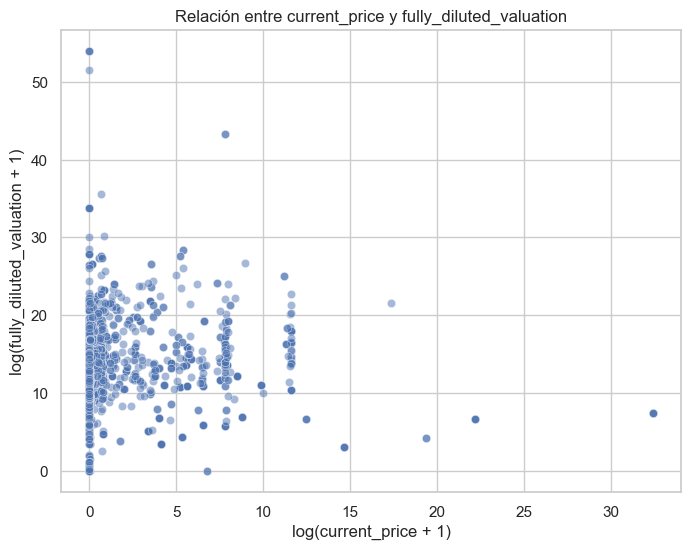

In [21]:
# Scatterplot en escala log-log
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=np.log1p(df['current_price']),
    y=np.log1p(df['fully_diluted_valuation']),
    alpha=0.5
)
plt.xlabel('log(current_price + 1)')
plt.ylabel('log(fully_diluted_valuation + 1)')
plt.title('Relación entre current_price y fully_diluted_valuation')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=np.log1p(df['total_supply']),
    y=np.log1p(df['current_price']),
    alpha=0.5
)
plt.xlabel('log(total_supply + 1)')
plt.ylabel('log(current_price + 1)')
plt.title('Relación entre total_supply y current_price')
plt.grid(True)
plt.show()


| **Variable**              | **Relación visual con `current_price`** | **¿Mantener?**           | **Comentario**                                                 |
| ------------------------- | --------------------------------------- | ------------------------ | -------------------------------------------------------------- |
| `fully_diluted_valuation` | Muy dispersa, sin patrón claro          | ⚠️ Dudoso                | No hay tendencia clara, evaluar si usarla como categoría bruta |
| `total_supply`            | Relación inversa leve visible           | ✅ Sí, con transformación | Puede ser útil al agrupar o usar en log para modelos           |
| `current_price`           | — (es target o principal referencia)    | ✅ Obligatorio            | Variable clave para la mayoría de análisis                     |


### Agrupar por rangos para explorar categorías útiles

In [23]:
df['precio_rango'] = pd.cut(
    df['current_price'],
    bins=[-1, 0.1, 1, 10, 100, 1000, np.inf],
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto', 'Extremo']
)

# Recuento de criptos por categoría
print(df['precio_rango'].value_counts())


precio_rango
Muy bajo    3615
Bajo         642
Medio        261
Extremo      216
Alto         144
Muy alto     117
Name: count, dtype: int64


| **Rango**             | **Cantidad**    | **Interpretación**                                                                    |
| --------------------- | --------------- | ------------------------------------------------------------------------------------- |
| Muy bajo              | 3615            | La gran mayoría de criptos valen menos de \$0.1 → este grupo podría ser significativo |
| Bajo–Medio            | 903 (642 + 261) | Representa un mercado minoritario de criptos con algo más de valor                    |
| Alto–Muy alto–Extremo | 477             | Criptos de precio significativo → tal vez más establecidas o con especulación fuerte  |


In [24]:
df['supply_grupo'] = pd.qcut(df['total_supply'], q=4, labels=['Bajo', 'Medio-bajo', 'Medio-alto', 'Alto'])

# Recuento de criptos por grupo
print(df['supply_grupo'].value_counts())


supply_grupo
Bajo          1170
Medio-bajo    1170
Medio-alto    1170
Alto          1170
Name: count, dtype: int64


| **Uso posible**                                      | **Variable**                            |
| ---------------------------------------------------- | --------------------------------------- |
| Análisis comparativo (gráficos, promedios por grupo) | `precio_rango`, `supply_grupo`          |
| Input categórico en modelos                          | `precio_rango`, `supply_grupo`          |
| Ver distribución de otras variables por grupo        | `volumen`, `porcentaje de cambio`, etc. |


## 4️⃣ Select Data – Justificación de selección de columnas

In [35]:
# Ver columnas con más de 50% de nulos que podrías excluir
columnas_excluir = null_percent[null_percent > 50].index.tolist()
print("Columnas candidatas a excluir:", columnas_excluir)

Columnas candidatas a excluir: ['market_cap_rank', 'roi']


In [36]:
# Verifica si hay columnas irrelevantes (ej. URL de imagen)
irrelevantes = ['image', 'roi']
print("Otras columnas candidatas a excluir:", irrelevantes)

Otras columnas candidatas a excluir: ['image', 'roi']


In [37]:
# Agregamos max_supply manualmente por baja relevancia para el negocio
columnas_excluir.extend(['max_supply'])

# Asegurar que no se repitan
columnas_excluir = list(set(columnas_excluir + irrelevantes))
print("Columnas finales a excluir:", columnas_excluir)

Columnas finales a excluir: ['image', 'max_supply', 'market_cap_rank', 'roi']


Además de las columnas market_cap_rank y roi excluidas por su alta proporción de valores nulos, se decidió también excluir max_supply al no ser determinante para el objetivo del negocio. Esta variable representa el suministro máximo de tokens, pero dada su alta cantidad de valores faltantes (41%) y su limitada utilidad directa en la identificación de activos según narrativa y valorización, se descartó para este análisis.

## 🔄 Clean Data – Limpieza de datos

In [38]:
# Eliminar columnas irrelevantes o incompletas
df = df.drop(columns=columnas_excluir, errors='ignore')

In [39]:
# Imputar columnas numéricas con pocos nulos
cols_num = df.select_dtypes(include='number').columns
for col in cols_num:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [40]:
# Comprobar que no quedan nulos
print("Nulos restantes:", df.isna().sum().sort_values(ascending=False))

Nulos restantes: ath_date                            2
atl_date                            2
symbol                              1
current_price                       0
name                                0
id                                  0
fully_diluted_valuation             0
market_cap                          0
total_volume                        0
high_24h                            0
price_change_percentage_24h         0
market_cap_change_24h               0
low_24h                             0
price_change_24h                    0
circulating_supply                  0
market_cap_change_percentage_24h    0
ath                                 0
total_supply                        0
ath_change_percentage               0
atl                                 0
atl_change_percentage               0
last_updated                        0
dtype: int64


In [41]:
# Eliminar filas con nulos restantes
df = df.dropna()

In [42]:
# Verificar que no quede nada pendiente
print("Nulos finales:", df.isna().sum().sum())

Nulos finales: 0


# snapshot_master

In [44]:
# 📂 Cargar el dataset
df = pd.read_csv('data/snapshot_master.csv')

## 1️⃣ Describe Data – Descripción inicial del dataset

In [45]:
print(df.dtypes)

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                          float64
market_cap_rank                     float64
fully_diluted_valuation             float64
total_volume                        float64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [46]:
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Cantidad de filas: 2188
Cantidad de columnas: 27


## 2️⃣ Verify Data Quality – Calidad de datos

In [47]:
# Revisión de valores nulos
print(df.isna().sum().sort_values(ascending=False))

market_cap_rank                     2188
roi                                 2175
max_supply                           834
price_change_24h                     615
market_cap_change_24h                615
price_change_percentage_24h          615
market_cap_change_percentage_24h     615
low_24h                              615
high_24h                             615
fully_diluted_valuation              141
total_supply                         133
current_price                          2
ath_date                               1
atl_date                               1
ath                                    1
atl                                    1
symbol                                 1
id                                     0
name                                   0
total_volume                           0
market_cap                             0
image                                  0
circulating_supply                     0
atl_change_percentage                  0
ath_change_perce

In [49]:
# Porcentaje de valores nulos por columna
null_percent = df.isna().mean() * 100
print(null_percent.sort_values(ascending=False))

market_cap_rank                     100.000000
roi                                  99.405850
max_supply                           38.117002
price_change_24h                     28.107861
market_cap_change_24h                28.107861
price_change_percentage_24h          28.107861
market_cap_change_percentage_24h     28.107861
low_24h                              28.107861
high_24h                             28.107861
fully_diluted_valuation               6.444241
total_supply                          6.078611
current_price                         0.091408
ath_date                              0.045704
atl_date                              0.045704
ath                                   0.045704
atl                                   0.045704
symbol                                0.045704
id                                    0.000000
name                                  0.000000
total_volume                          0.000000
market_cap                            0.000000
image        

In [48]:
# Revisión de duplicados
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 217


In [50]:
# Columnas con un solo valor único (sin variabilidad)
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Columna sin variabilidad: {col} -> {df[col].unique()[0]}")

Columna sin variabilidad: market_cap -> 0.0


## 3️⃣ Explore Data – Exploración visual (solo columnas numéricas sin muchos nulos)

### Histogramas

In [51]:
cols_hist = [
    'current_price',
    'circulating_supply',
    'total_supply',
    'max_supply',
    'price_change_24h',
    'price_change_percentage_24h',
    'market_cap_change_24h',
    'market_cap_change_percentage_24h',
    'low_24h',
    'high_24h',
    'fully_diluted_valuation'
]

In [ ]:
# Estilo visual
sns.set(style='whitegrid')
plt.figure(figsize=(16, 25))  # Ajusta tamaño según cantidad

# Graficar cada histograma
for i, col in enumerate(cols_hist, 1):
    plt.subplot(6, 2, i)  # Cambia el layout si usas más o menos columnas
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Visualizar mejor los outliers con boxplots 

In [53]:
cols_boxplot = [
    'current_price',
    'circulating_supply',
    'total_supply',
    'max_supply',
    'price_change_24h',
    'fully_diluted_valuation',
    'high_24h',
    'market_cap_change_24h'
]


In [ ]:
# boxplots normales
sns.set(style='whitegrid')
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols_boxplot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col].dropna(), color='lightblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# boxplots con log(x+1)
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols_boxplot, 1):
    plt.subplot(4, 2, i)
    log_data = np.log1p(df[col].dropna())
    sns.boxplot(x=log_data, color='salmon')
    plt.title(f'Boxplot log(x+1): {col}')
    plt.xlabel(f'log({col} + 1)')

plt.tight_layout()
plt.show()

### Graficar la matriz de correlación

In [56]:
# Seleccionamos solo columnas numéricas válidas
df_corr = df.select_dtypes(include=['float64', 'int64']).copy()

# Opcional: eliminar columnas no útiles
df_corr = df_corr.drop(columns=['roi', 'market_cap', 'market_cap_rank'], errors='ignore')


In [ ]:
# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Crear heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

### Scatterplots relevantes

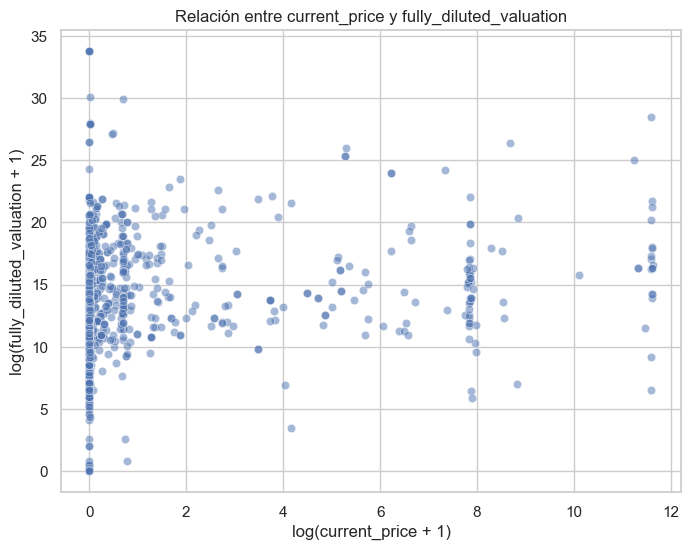

In [58]:
# Scatterplot en escala log-log
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=np.log1p(df['current_price']),
    y=np.log1p(df['fully_diluted_valuation']),
    alpha=0.5
)
plt.xlabel('log(current_price + 1)')
plt.ylabel('log(fully_diluted_valuation + 1)')
plt.title('Relación entre current_price y fully_diluted_valuation')
plt.grid(True)
plt.show()

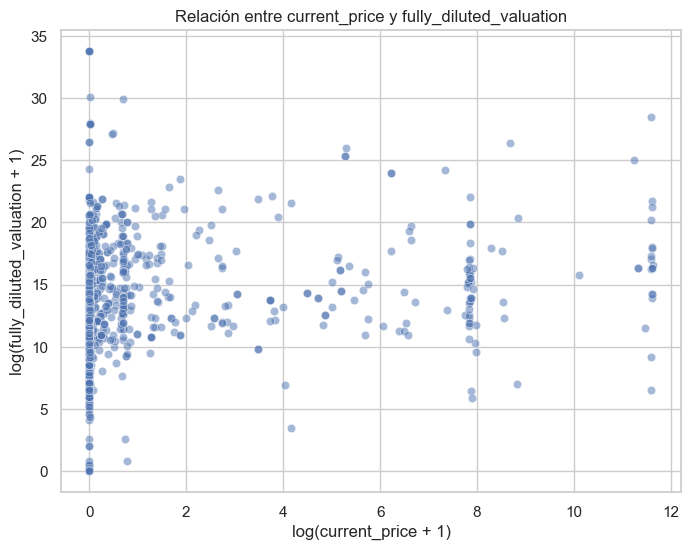

In [59]:
# Scatterplot en escala log-log
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=np.log1p(df['current_price']),
    y=np.log1p(df['fully_diluted_valuation']),
    alpha=0.5
)
plt.xlabel('log(current_price + 1)')
plt.ylabel('log(fully_diluted_valuation + 1)')
plt.title('Relación entre current_price y fully_diluted_valuation')
plt.grid(True)
plt.show()

### Agrupar por rangos para explorar categorías útiles

In [60]:
df['precio_rango'] = pd.cut(
    df['current_price'],
    bins=[-1, 0.1, 1, 10, 100, 1000, np.inf],
    labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto', 'Extremo']
)

# Recuento de criptos por categoría
print(df['precio_rango'].value_counts())


precio_rango
Muy bajo    1673
Bajo         215
Medio        116
Extremo       90
Alto          47
Muy alto      45
Name: count, dtype: int64


In [61]:
df['supply_grupo'] = pd.qcut(df['total_supply'], q=4, labels=['Bajo', 'Medio-bajo', 'Medio-alto', 'Alto'])

# Recuento de criptos por grupo
print(df['supply_grupo'].value_counts())


supply_grupo
Medio-alto    547
Bajo          514
Medio-bajo    514
Alto          480
Name: count, dtype: int64


# price_hist_master

In [3]:
# Carga del archivo
df = pd.read_csv("precios_historicos/price_hist_master.csv")

## 1️⃣ Describe Data – Descripción inicial del dataset

In [64]:
print(df.dtypes)

symbol     object
date       object
price     float64
dtype: object


In [65]:
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Cantidad de filas: 440512
Cantidad de columnas: 3


In [70]:
# Convertir la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar por símbolo y fecha (opcional pero útil)
df = df.sort_values(['symbol', 'date']).reset_index(drop=True)

## 2️⃣ Verify Data Quality – Calidad de datos

In [71]:
# Revisión de valores nulos
print(df.isna().sum().sort_values(ascending=False))

symbol    0
date      0
price     0
dtype: int64


In [72]:
# Revisión de duplicados
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 60728


## 3️⃣ Explore Data – Exploración visual (solo columnas numéricas sin muchos nulos)

### Estadísticas descriptivas globales y por símbolo

In [73]:
# Global
df['price'].describe()

count    4.405120e+05
mean     2.239206e+03
std      4.410075e+04
min      0.000000e+00
25%      2.940994e-05
50%      1.209047e-03
75%      9.287797e-02
max      3.857650e+06
Name: price, dtype: float64

| Métrica           | Valor       | Interpretación                                                                                                       |
| ----------------- | ----------- | -------------------------------------------------------------------------------------------------------------------- |
| **count**         | `440,512`   | Hay 440,512 registros de precios totales (líneas válidas).                                                           |
| **mean**          | `2,239.21`  | El **precio promedio** es 2,239.21 USD, pero está claramente sesgado por unos pocos valores muy altos.               |
| **std**           | `44,100.75` | La **desviación estándar** es altísima → hay mucha variabilidad.                                                     |
| **min**           | `0.0`       | Hay monedas con precio igual a **cero**. Puede ser error o caso extremo.                                             |
| **25% (Q1)**      | `2.94e-05`  | El 25% de los precios está por debajo de 0.0000294 USD.                                                              |
| **50% (mediana)** | `1.29e-04`  | El 50% de los precios está por debajo de **0.000129 USD**, o sea, la mayoría de criptos tiene precios **muy bajos**. |
| **75% (Q3)**      | `0.0929`    | El 75% de los precios está por debajo de **0.0929 USD**.                                                             |
| **max**           | `3,857,650` | La criptomoneda más cara llegó a costar 3.85 millones de USD. Probablemente sea un outlier.                          |


In [ ]:
# Por símbolo
df.groupby('symbol')['price'].describe()

### Visualización de precios 

In [4]:
n_simbolos = df['symbol'].nunique()
print("Cantidad de criptomonedas únicas:", n_simbolos)

Cantidad de criptomonedas únicas: 1312


In [ ]:
# Elegir un símbolo a visualizar (ej. el primero del dataset)
simbolo = df['symbol'].unique()[0]
df_simbolo = df[df['symbol'] == simbolo]

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_simbolo['date'], df_simbolo['price'], marker='o')
plt.title(f'Evolución del precio de {simbolo}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

In [76]:
# Ver cuántos días tiene cada símbolo (densidad temporal)
df['symbol'].value_counts().to_frame(name='n_días')

,n_días
symbol,
1000troll,1464
aipepe,1464
shibai,1464
vark,1460
usedcar,1098
...,...
term,1
form,1
hodl,1


In [6]:
simbolos_validos = df['symbol'].value_counts()
simbolos_validos = simbolos_validos[simbolos_validos >= 365].index  # al menos 1 año
df_filtrado = df[df['symbol'].isin(simbolos_validos)]
print("Cantidad de símbolos con al menos 365 días:", len(simbolos_validos))

Cantidad de símbolos con al menos 365 días: 521


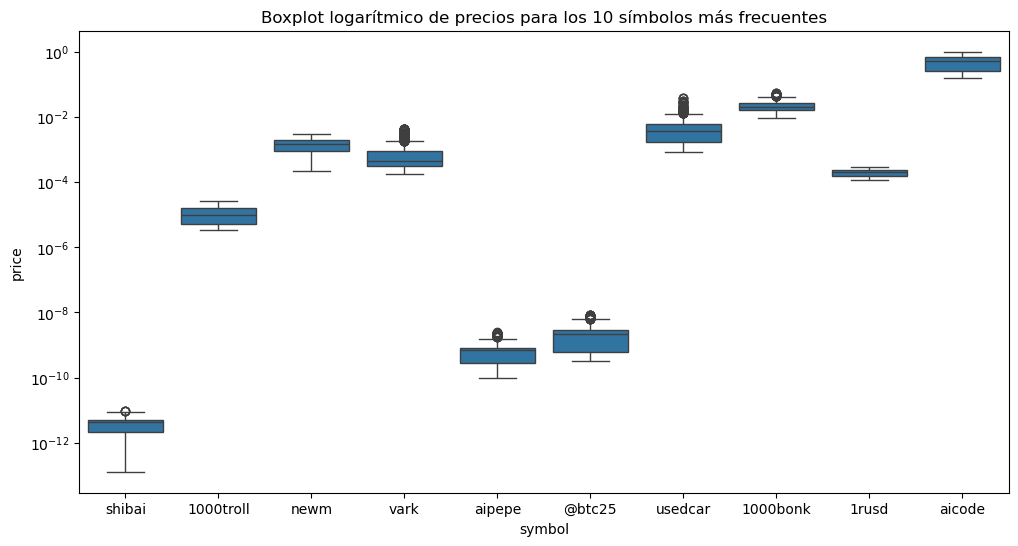

In [7]:
top_symbols = df_filtrado['symbol'].value_counts().head(10).index
df_top = df_filtrado[df_filtrado['symbol'].isin(top_symbols)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='symbol', y='price')
plt.yscale('log')  # Para manejar mejor las diferencias de escala
plt.title('Boxplot logarítmico de precios para los 10 símbolos más frecuentes')
plt.show()

### Detectar outliers con boxplot (por símbolo)

In [8]:
# Boxplot por símbolo (sólo si son pocos símbolos)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='symbol', y='price')
plt.yscale('log')  # Escala log si los precios varían mucho
plt.xticks(rotation=45)
plt.title('Boxplot de precios por símbolo')
plt.show()

ValueError: 
ngtg$$
    ^
ParseException: Expected end of text, found '$'  (at char 4), (line:1, col:5)

<Figure size 1200x600 with 1 Axes>

# training_from_history

In [9]:
# Carga del archivo
df = pd.read_csv("precios_historicos/training_from_history.csv")

## 1️⃣ Describe Data – Descripción inicial del dataset

In [10]:
print(df.dtypes)

symbol                object
date                  object
price                float64
ma7                  float64
rsi14                float64
price_future_30d     float64
target_return_30d    float64
target_up_30d          int64
price_future_60d     float64
target_return_60d    float64
target_up_60d          int64
price_future_90d     float64
target_return_90d    float64
target_up_90d          int64
dtype: object


In [11]:
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Cantidad de filas: 327299
Cantidad de columnas: 14


## 2️⃣ Verify Data Quality – Calidad de datos

In [12]:
# Revisión de valores nulos
print(df.isna().sum().sort_values(ascending=False))

rsi14                15922
ma7                   7370
date                     0
symbol                   0
price                    0
price_future_30d         0
target_return_30d        0
target_up_30d            0
price_future_60d         0
target_return_60d        0
target_up_60d            0
price_future_90d         0
target_return_90d        0
target_up_90d            0
dtype: int64


In [13]:
# Revisión de duplicados
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 469


## 3️⃣ Explore Data – Exploración visual (solo columnas numéricas sin muchos nulos)

In [14]:
# Global
df['price'].describe()

count    3.272990e+05
mean     2.499859e+03
std      5.049896e+04
min      2.300457e-20
25%      3.640781e-05
50%      1.463641e-03
75%      1.083870e-01
max      3.857650e+06
Name: price, dtype: float64

### Visualización de distribución de price

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xscale('log')
plt.title('Distribución del Precio (escala logarítmica)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

dataset está dominado por criptomonedas de precio bajo o muy bajo.

Puede haber outliers con precios enormes que alteran la media y la desviación estándar.

considerar:

Hacer análisis separados por rangos de precios.

Aplicar transformación logarítmica a price si vas a usarlo en modelos.



### Distribucion de columnas

In [ ]:
columnas_numericas = ['ma7', 'price_future_30d', 'target_return_30d', 
                      'price_future_60d', 'target_return_60d', 
                      'price_future_90d', 'target_return_90d']

# Filtrar solo columnas sin valores nulos
columnas_sin_nulos = [col for col in columnas_numericas if col in df.columns and df[col].isna().sum() == 0]

# Calcular el número de filas necesarias (3 columnas por fila)
n_cols = 3
n_rows = (len(columnas_sin_nulos) // n_cols + (1 if len(columnas_sin_nulos) % n_cols else 0))

# Crear la figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
fig.tight_layout(pad=4.0)

# Aplanar el array de axes para facilitar el acceso
axes = axes.flatten()

# Generar los histogramas
for i, col in enumerate(columnas_sin_nulos):
    sns.histplot(df[col], bins=100, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].grid(True)

# Ocultar los ejes vacíos si hay más subplots que columnas
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.show()

| **Variable**         | **Distribución observada**                        | **Interpretación**                                                                          | **Sugerencia**                                                               |
| -------------------  | ------------------------------------------------- | ------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| `price_future_30d`  | Muy sesgada a la derecha (valores extremos altos) | La mayoría de los precios futuros están cerca de 0, con algunos valores muy altos           | Aplicar logaritmo o limitar valores máximos para visualizar mejor            |
| `target_return_30d` |  Extremadamente sesgada a la derecha               | Algunos retornos son tan grandes que aplastan la distribución (probables errores)           | Filtrar outliers extremos (>10 o >100) antes de análisis o visualización     |
| `price_future_60d`  |  Similar a `price_future_30d`                      | Comportamiento casi idéntico: concentración cerca de 0, algunos precios altísimos           | Log-transformación y limpieza de valores extremos                            |
| `target_return_60d` | Misma situación que `target_return_30d`           | Picos altísimos probablemente por errores o valores atípicos                                | Filtrar valores poco realistas, verificar si hay criptos con datos corruptos |
| `price_future_90d`  |  Sesgo fuerte a la derecha                         | Patrones consistentes en el tiempo: precios bajos son mayoría                               | Visualizar con log y considerar discretizar para modelos                     |
| `target_return_90d` |  Pico masivo en cero, con algunos valores enormes  | Retornos cercanos a 0 para casi todas las criptos, pero con algunos valores fuera de escala | Filtrar para evitar distorsión en modelos o gráficos                         |


### Boxplots por columna (detección visual de outliers)

In [ ]:
# 3. Configurar el layout de los subplots
n_cols = 3
n_rows = (len(columnas_sin_nulos) + n_cols - 1) // n_cols  # Cálculo más robusto

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
fig.tight_layout(pad=3.0)

# Aplanar el array de axes si hay múltiples filas
axes = axes.ravel() if n_rows > 1 else [axes]

# 4. Generar los boxplots
for i, col in enumerate(columnas_sin_nulos):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}', pad=10)
    axes[i].grid(True, alpha=0.3)
    
    # Rotar etiquetas del eje x si son muy largas
    if len(col) > 15:
        axes[i].tick_params(axis='x', rotation=45)

# 5. Ocultar ejes vacíos
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.show()

| Variable            | Distribución en Boxplot              | Interpretación clave                                                                |
| ------------------- | ------------------------------------ | ----------------------------------------------------------------------------------- |
| `price_future_30d`  | Denso en la base, con outliers altos | La mayoría de los precios están muy bajos. Hay valores extremos hacia arriba.       |
| `target_return_30d` | Extremo derecho exagerado            | Hay un retorno **absurdo (≈10¹²)** que rompe toda la escala. Probablemente erróneo. |
| `price_future_60d`  | Igual que `price_future_30d`         | Repite el patrón: mayoría muy bajos, pero con algunos precios altísimos.            |
| `target_return_60d` | Igual que `target_return_30d`        | Nuevamente hay uno o varios retornos gigantescos que deben revisarse o eliminarse.  |
| `price_future_90d`  | Igual a los anteriores               | Muchos outliers hacia arriba.                                                       |
| `target_return_90d` | Misma situación                      | Un único valor o unos pocos dominan completamente el gráfico.                       |
